In [67]:
#!pip install causalnex

In [68]:
#!apt install libgraphviz-dev

In [69]:
#!pip install pygraphviz

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
!ls "/content/drive/My Drive/week7"

causal_graph.ipynb  data.csv	    InterviewPrepFumbaniBanda.docx
causal.ipynb	    feature_viz.py


In [72]:
import numpy as np
import pandas as pd

import pygraphviz
# silence warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder


from causalnex.structure import StructureModel
from IPython.display import Image
from causalnex.structure.notears import from_pandas,from_pandas_lasso
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE


In [73]:

df1  = pd.read_csv('/content/drive/My Drive/week7/data.csv')

In [74]:
df_c = df1 [[ 'perimeter_worst','area_worst','radius_worst','concave points_worst','concave points_mean','diagnosis',
           'area_mean']]
df

,perimeter_worst,area_worst,radius_worst,concave points_worst,concave points_mean,diagnosis,area_mean
0,184.60,2019.0,25.380,0.2654,0.14710,M,1001.0
1,158.80,1956.0,24.990,0.1860,0.07017,M,1326.0
2,152.50,1709.0,23.570,0.2430,0.12790,M,1203.0
3,98.87,567.7,14.910,0.2575,0.10520,M,386.1
4,152.20,1575.0,22.540,0.1625,0.10430,M,1297.0
...,...,...,...,...,...,...,...
564,166.10,2027.0,25.450,0.2216,0.13890,M,1479.0
565,155.00,1731.0,23.690,0.1628,0.09791,M,1261.0
566,126.70,1124.0,18.980,0.1418,0.05302,M,858.1
567,184.60,1821.0,25.740,0.2650,0.15200,M,1265.0


In [75]:
df = df_c.copy()

non_numeric_columns = list(df.select_dtypes(exclude=[np.number]).columns)
print(non_numeric_columns)

['diagnosis']


In [76]:
le = LabelEncoder()
for col in non_numeric_columns:
    df[col] = le.fit_transform(df[col])


In [77]:
sm = StructureModel()

In [78]:

struct_data = df_c.copy()

non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)
print(non_numeric_columns)

['diagnosis']


In [79]:

le = LabelEncoder()
for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

#struct_data.drop('Unnamed: 32',axis=1,inplace=True)
#struct_data.drop('id',axis=1,inplace=True)
struct_data.head(5)

,perimeter_worst,area_worst,radius_worst,concave points_worst,concave points_mean,diagnosis,area_mean
0,184.60,2019.0,25.38,0.2654,0.14710,1,1001.0
1,158.80,1956.0,24.99,0.1860,0.07017,1,1326.0
2,152.50,1709.0,23.57,0.2430,0.12790,1,1203.0
3,98.87,567.7,14.91,0.2575,0.10520,1,386.1
4,152.20,1575.0,22.54,0.1625,0.10430,1,1297.0


In [80]:

sm = from_pandas(struct_data)


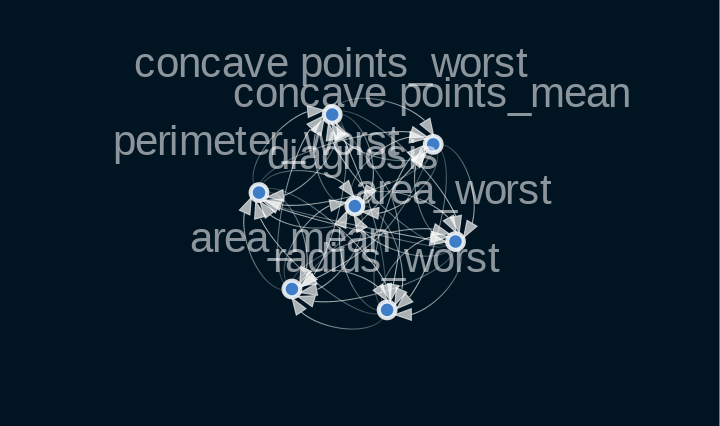

In [81]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

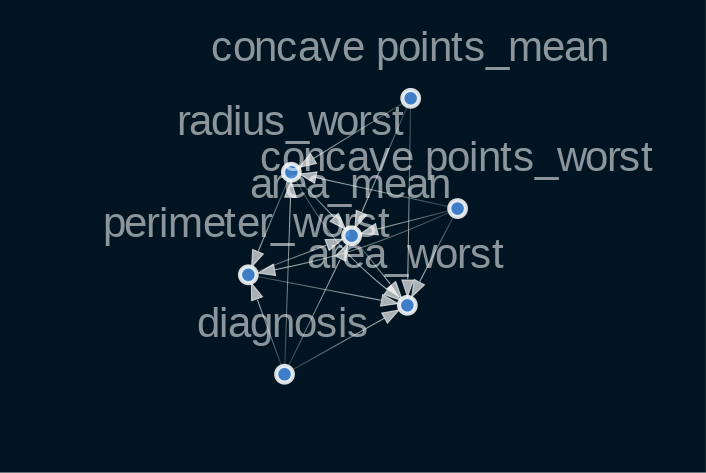

In [82]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

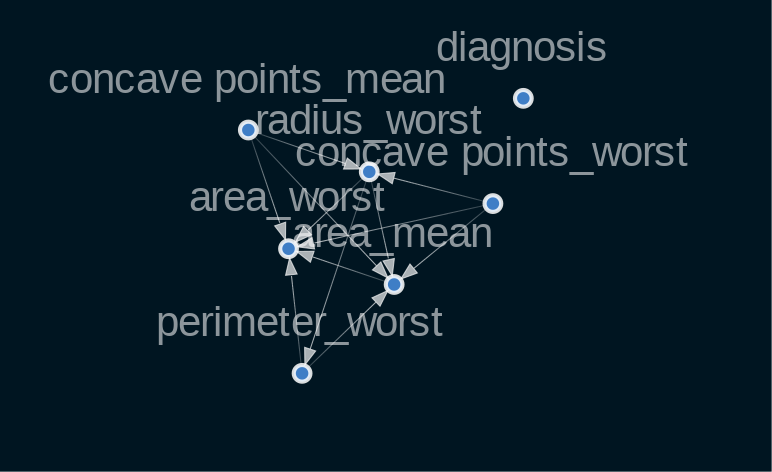

In [83]:
sm.remove_edges_below_threshold(0.8)
sm = from_pandas(struct_data, tabu_parent_nodes=["diagnosis"], w_threshold=0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

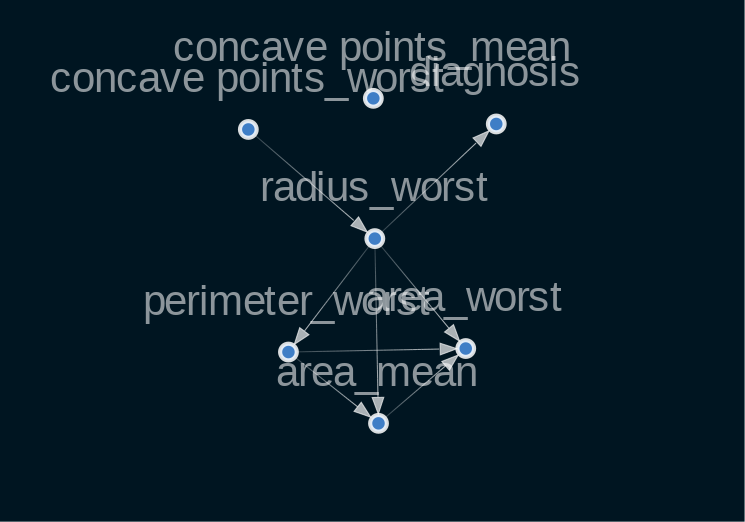

In [84]:
sm2 = from_pandas_lasso(struct_data, tabu_parent_nodes=["diagnosis"], w_threshold=0.8,beta=0.8)
viz = plot_structure(
    sm2,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [85]:
#similarity between a graph plotted without lasso regularization and one plotted with lasso regularization
def jaccard_similarity(g, h):
    i = set(g).intersection(h)
    return round(len(i) / (len(g) + len(h) - len(i)),3)

jaccard_similarity(sm.edges(), sm2.edges())

0.538

In [86]:
df_1 = df.iloc[:100,:]
df_2 = df.iloc[:300,:]
df_3 = df.iloc[:,:] 

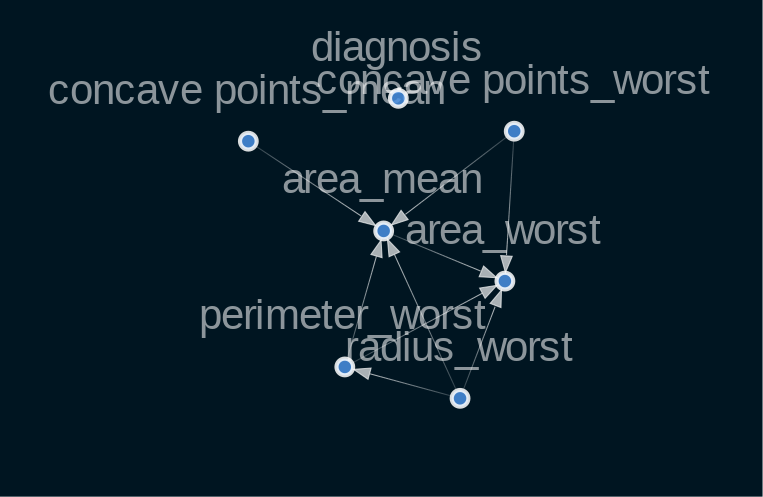

In [87]:
sm.remove_edges_below_threshold(0.8)
sm = from_pandas(df_1, tabu_parent_nodes=["diagnosis"], w_threshold=0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))